In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#city_data_to_load = "data/city_data.csv"
#ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset1
drop_data = city_data.drop_duplicates('city', keep = 'first')
combined_data = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

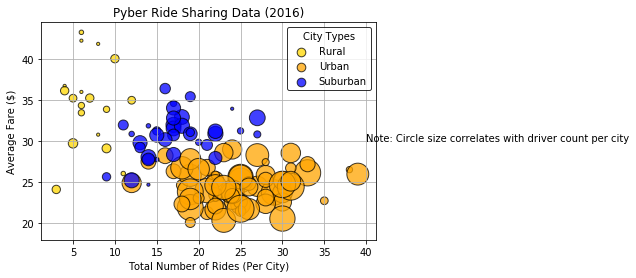

In [4]:
# Obtain the x and y coordinates for each of the three city types

city_group= combined_data.groupby("city")
average_fare= city_group.mean()["fare"]
drivers_per_city = city_group.mean()["driver_count"]
ride_count = city_group["ride_id"].count()
city_type = drop_data.set_index("city")["type"]

new_df = pd.DataFrame({"Number of Drivers": drivers_per_city,
                       "Average Fare": average_fare, 
                       "Ride Count": ride_count,
                       "Type of City": city_type
                      })

# Build the scatter plots for each city types
rural_type = new_df[new_df["Type of City"]== "Rural"]
plt.scatter(rural_type["Ride Count"], rural_type["Average Fare"], s=rural_type["Number of Drivers"]*10,
           edgecolor="black", alpha=.75, color="gold", linewidths=1.0, label="Rural")

urban_type = new_df[new_df["Type of City"]== "Urban"]
plt.scatter(urban_type["Ride Count"], urban_type["Average Fare"], s=urban_type["Number of Drivers"]*10,
           edgecolor="black", alpha=.75, color="orange", linewidths=1.0, label="Urban")

sub_type = new_df[new_df["Type of City"]== "Suburban"]
plt.scatter(sub_type["Ride Count"], sub_type["Average Fare"], s=sub_type["Number of Drivers"]*10,
           edgecolor="black", alpha=.75, color="blue", linewidths=1.0, label="Suburban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
scatter_legend = plt.legend(title="City Types", edgecolor="black")
scatter_legend.legendHandles[0]._sizes=[75]
scatter_legend.legendHandles[1]._sizes=[75]
scatter_legend.legendHandles[2]._sizes=[75]

# Incorporate a text label regarding circle size
plt.text(s="Note: Circle size correlates with driver count per city", y=30, x=40)
# Save Figure
plt.savefig("pyber_snap.png")
plt.show()


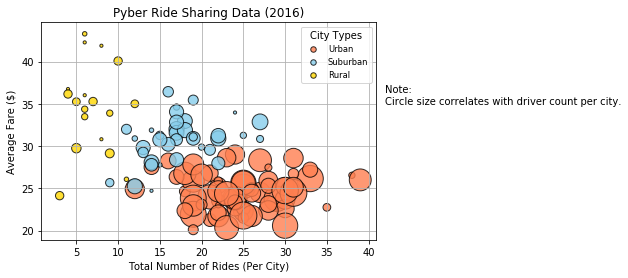

In [3]:
# Show plot


## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

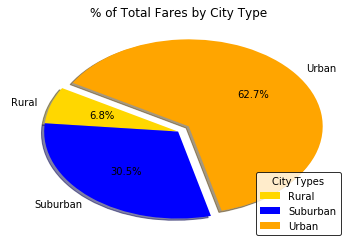

In [5]:
# Calculate Type Percents
fare_df = combined_data.groupby("type")["fare", "type"]
fares = fare_df.sum()["fare"]
# Build Pie Chart
labels= ["Rural", "Suburban", "Urban"]
colors = ["gold", "blue", "orange"]
explode = (0, 0, 0.1)
plt.pie(fares, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[75]
leg.legendHandles[1]._sizes=[75]
leg.legendHandles[2]._sizes=[75]
# Save Figure
plt.savefig("pyber_pie_chart.png")
plt.show

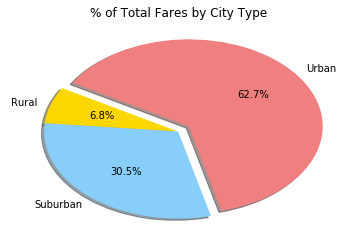

In [4]:
# Show Figure


## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

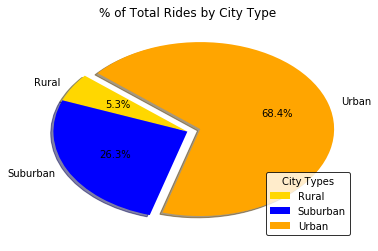

In [6]:
# Calculate Ride Percents
ride_count2 = combined_data.groupby("type")["ride_id"]
rides = ride_count2.count()
# Build Pie Chart
plt.pie(rides, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[75]
leg.legendHandles[1]._sizes=[75]
leg.legendHandles[2]._sizes=[75]
# Save Figure
plt.savefig("pyber_pie_chart2.png")
plt.show

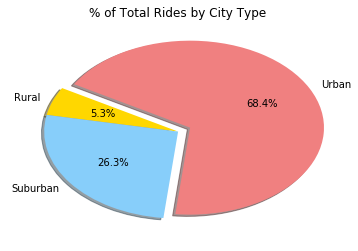

In [5]:
# Show Figure


## Total Drivers by City Type

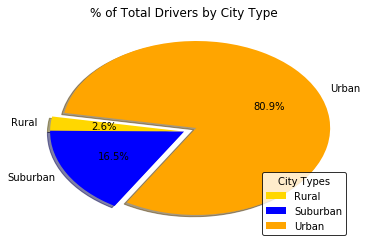

In [7]:
# Calculate Driver Percents
driver_count2 = combined_data.drop_duplicates("city", keep="first")

driver_df = driver_count2.groupby("type")
driver_total = driver_df.sum()["driver_count"]

# Build Pie Charts
plt.pie(driver_total, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[75]
leg.legendHandles[1]._sizes=[75]
leg.legendHandles[2]._sizes=[75]
# Save Figure
plt.savefig("pyber_pie_chart3.png")

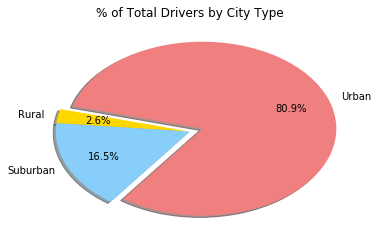

In [6]:
# Show Figure
